In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Dataset_ecommerce.csv', parse_dates=['InvoiceDate'])

In [3]:
df.head()

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country
0,536365,2010-12-01 08:26:00,17850.0,SC1734,Electronics,65,10.23,Egypt
1,536365,2010-12-01 08:26:00,17850.0,SC2088,Furniture,95,19.61,Mali
2,536365,2010-12-01 08:26:00,17850.0,SC3463,Books,78,61.49,Mali
3,536365,2010-12-01 08:26:00,17850.0,SC6228,Toys,15,24.73,South Africa
4,536365,2010-12-01 08:26:00,17850.0,SC2149,Toys,50,38.83,Rwanda


In [4]:
df. info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   InvoiceDate  541909 non-null  datetime64[ns]
 2   CustomerID   406829 non-null  float64       
 3   StockCode    541909 non-null  object        
 4   Description  541909 non-null  object        
 5   Quantity     541909 non-null  int64         
 6   UnitPrice    541909 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [7]:
df.isnull().sum()

InvoiceNo      0
InvoiceDate    0
CustomerID     0
StockCode      0
Description    0
Quantity       0
UnitPrice      0
Country        0
dtype: int64

In [8]:
df= df.dropna(subset=['CustomerID'])

In [9]:
df.head(10)

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country
0,536365,2010-12-01 08:26:00,17850.0,SC1734,Electronics,65,10.23,Egypt
1,536365,2010-12-01 08:26:00,17850.0,SC2088,Furniture,95,19.61,Mali
2,536365,2010-12-01 08:26:00,17850.0,SC3463,Books,78,61.49,Mali
3,536365,2010-12-01 08:26:00,17850.0,SC6228,Toys,15,24.73,South Africa
4,536365,2010-12-01 08:26:00,17850.0,SC2149,Toys,50,38.83,Rwanda
5,536365,2010-12-01 08:26:00,17850.0,SC7895,Toys,41,45.31,Sierra Leone
6,536365,2010-12-01 08:26:00,17850.0,SC8608,Books,44,39.31,Benin
7,536366,2010-12-01 08:28:00,17850.0,SC3216,Toys,47,77.35,Burkina Faso
8,536366,2010-12-01 08:28:00,17850.0,SC1236,Kitchenware,19,35.11,Nigeria
9,536367,2010-12-01 08:34:00,13047.0,SC4513,Furniture,55,3.21,Cote d'Ivoire


In [10]:
df['customerID'] = df['CustomerID'].astype(int).astype(str)
                                        

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   InvoiceDate  406829 non-null  datetime64[ns]
 2   CustomerID   406829 non-null  float64       
 3   StockCode    406829 non-null  object        
 4   Description  406829 non-null  object        
 5   Quantity     406829 non-null  int64         
 6   UnitPrice    406829 non-null  float64       
 7   Country      406829 non-null  object        
 8   customerID   406829 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 31.0+ MB


In [12]:
num_customers = df['CustomerID'].nunique()
num_Transactions = df['InvoiceNo'].nunique()
num_products = df['StockCode'].nunique()

In [13]:
print(f'Number of unique customers {num_customers}')
print(f'Number of Transactions {num_Transactions}')
print(f'Number of products {num_products}')

Number of unique customers 4372
Number of Transactions 22190
Number of products 9000


In [14]:
date_range = (df['InvoiceDate'].min(),df['InvoiceDate'].max())

In [15]:
print(f' Transaction period: {date_range[0]}, {date_range[1]}')

 Transaction period: 2010-12-01 08:26:00, 2011-12-09 12:50:00


In [16]:
print(f'Rows with negative quantity: {(df.Quantity <= 0).sum()}')

Rows with negative quantity: 0


In [17]:
top_countries = df.groupby('Country')['CustomerID'].nunique().sort_values(ascending=False).head()

In [18]:
print(top_countries)

Country
Mozambique      3072
Benin           3054
Togo            3053
Nigeria         3051
Burkina Faso    3049
Name: CustomerID, dtype: int64


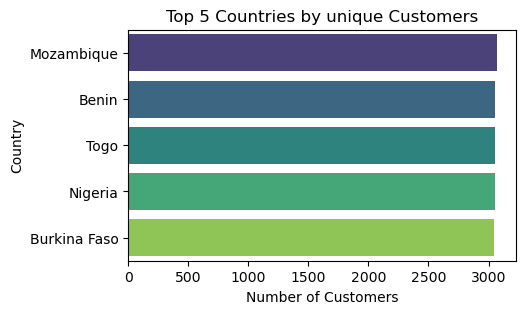

In [19]:
plt.figure(figsize=(5, 3))
sns.barplot(x= top_countries.values, y=top_countries.index, palette= 'viridis')
plt.title('Top 5 Countries by unique Customers')
plt.xlabel('Number of Customers')
plt.ylabel('Country')
plt.show()

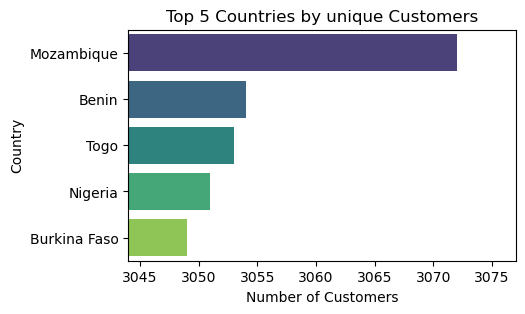

In [20]:
plt.figure(figsize=(5, 3))
sns.barplot(x= top_countries.values, y=top_countries.index, palette= 'viridis')
plt.xlim(min(top_countries.values) - 5, max(top_countries.values) + 5 )
plt.title('Top 5 Countries by unique Customers')
plt.xlabel('Number of Customers')
plt.ylabel('Country')
plt.show()

In [21]:
df.head()

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country,customerID
0,536365,2010-12-01 08:26:00,17850.0,SC1734,Electronics,65,10.23,Egypt,17850
1,536365,2010-12-01 08:26:00,17850.0,SC2088,Furniture,95,19.61,Mali,17850
2,536365,2010-12-01 08:26:00,17850.0,SC3463,Books,78,61.49,Mali,17850
3,536365,2010-12-01 08:26:00,17850.0,SC6228,Toys,15,24.73,South Africa,17850
4,536365,2010-12-01 08:26:00,17850.0,SC2149,Toys,50,38.83,Rwanda,17850


In [22]:
df['InvoiceMonth'] = df['InvoiceDate'].dt.to_period('M')

In [23]:
df['Revenue'] = df['Quantity'] * df['UnitPrice']

In [24]:
df.head()

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country,customerID,InvoiceMonth,Revenue
0,536365,2010-12-01 08:26:00,17850.0,SC1734,Electronics,65,10.23,Egypt,17850,2010-12,664.95
1,536365,2010-12-01 08:26:00,17850.0,SC2088,Furniture,95,19.61,Mali,17850,2010-12,1862.95
2,536365,2010-12-01 08:26:00,17850.0,SC3463,Books,78,61.49,Mali,17850,2010-12,4796.22
3,536365,2010-12-01 08:26:00,17850.0,SC6228,Toys,15,24.73,South Africa,17850,2010-12,370.95
4,536365,2010-12-01 08:26:00,17850.0,SC2149,Toys,50,38.83,Rwanda,17850,2010-12,1941.50


In [25]:
monthly_sales = df.groupby('InvoiceMonth')['Revenue'].sum().reset_index()

In [26]:
monthly_sales['InvoiceMonth']= monthly_sales['InvoiceMonth'].astype(str)

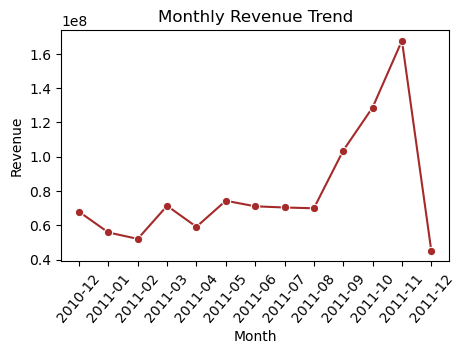

In [27]:
plt.figure(figsize=(5, 3))
sns.lineplot(x='InvoiceMonth', y='Revenue', data=monthly_sales, marker='o', color='brown')
plt.title('Monthly Revenue Trend')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.xticks(rotation=50)
plt.show()

#cohort Analysis

In [28]:
cohort_data = df.groupby('CustomerID')['InvoiceMonth'].min()

In [29]:
cohort_data.name = 'CohortMonth'

In [30]:
cohort_data

CustomerID
12346.0    2011-01
12347.0    2010-12
12348.0    2010-12
12349.0    2011-11
12350.0    2011-02
            ...   
18280.0    2011-03
18281.0    2011-06
18282.0    2011-08
18283.0    2011-01
18287.0    2011-05
Name: CohortMonth, Length: 4372, dtype: period[M]

In [31]:
df = df.merge(cohort_data, on='CustomerID')

In [32]:
df.head()

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country,customerID,InvoiceMonth,Revenue,CohortMonth
0,536365,2010-12-01 08:26:00,17850.0,SC1734,Electronics,65,10.23,Egypt,17850,2010-12,664.95,2010-12
1,536365,2010-12-01 08:26:00,17850.0,SC2088,Furniture,95,19.61,Mali,17850,2010-12,1862.95,2010-12
2,536365,2010-12-01 08:26:00,17850.0,SC3463,Books,78,61.49,Mali,17850,2010-12,4796.22,2010-12
3,536365,2010-12-01 08:26:00,17850.0,SC6228,Toys,15,24.73,South Africa,17850,2010-12,370.95,2010-12
4,536365,2010-12-01 08:26:00,17850.0,SC2149,Toys,50,38.83,Rwanda,17850,2010-12,1941.50,2010-12


In [33]:
invoice_year, invoice_month = df['InvoiceMonth'].dt.year, df['InvoiceMonth'].dt.month
cohort_year, cohort_month = df['CohortMonth'].dt.year, df['CohortMonth'].dt.month

In [34]:
year_diff = invoice_year - cohort_year
month_diff = invoice_month - cohort_month

In [35]:
df['CohortIndex'] = year_diff * 12 +month_diff + 1

In [36]:
df.tail()

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country,customerID,InvoiceMonth,Revenue,CohortMonth,CohortIndex
406824,581578,2011-12-09 12:16:00,12713.0,SC2548,Toys,13,38.60,Ghana,12713,2011-12,501.80,2011-12,1
406825,581578,2011-12-09 12:16:00,12713.0,SC8736,Cosmetics,44,19.59,Libya,12713,2011-12,861.96,2011-12,1
406826,581578,2011-12-09 12:16:00,12713.0,SC5158,Books,90,44.22,Morocco,12713,2011-12,3979.80,2011-12,1
406827,581578,2011-12-09 12:16:00,12713.0,SC9010,Sports Equipment,20,92.38,Mali,12713,2011-12,1847.60,2011-12,1
406828,581578,2011-12-09 12:16:00,12713.0,SC5695,Sports Equipment,1,19.42,Niger,12713,2011-12,19.42,2011-12,1


In [37]:
cohort_counts = df.groupby(['CohortMonth', 'CohortIndex'])['CustomerID'].nunique().reset_index()

In [38]:
cohort_pivot = cohort_counts.pivot(index='CohortMonth', columns= 'CohortIndex', values='CustomerID')

In [39]:
cohort_pivot

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12,948.0,362.0,317.0,367.0,341.0,376.0,360.0,336.0,336.0,374.0,354.0,474.0,260.0
2011-01,421.0,101.0,119.0,102.0,138.0,126.0,110.0,108.0,131.0,146.0,155.0,63.0,NaN
2011-02,380.0,94.0,73.0,106.0,102.0,94.0,97.0,107.0,98.0,119.0,35.0,NaN,NaN
2011-03,440.0,84.0,112.0,96.0,102.0,78.0,116.0,105.0,127.0,39.0,NaN,NaN,NaN
2011-04,299.0,68.0,66.0,63.0,62.0,71.0,69.0,78.0,25.0,NaN,NaN,NaN,NaN
2011-05,279.0,66.0,48.0,48.0,60.0,68.0,74.0,29.0,NaN,NaN,NaN,NaN,NaN
2011-06,235.0,49.0,44.0,64.0,58.0,79.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-07,191.0,40.0,39.0,44.0,52.0,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08,167.0,42.0,42.0,42.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
#Retention

In [41]:
cohort_size = cohort_pivot.iloc[:,0]
retention = cohort_pivot.divide(cohort_size, axis=0).round(3)
retention

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12,1.0,0.382,0.334,0.387,0.360,0.397,0.380,0.354,0.354,0.395,0.373,0.50,0.274
2011-01,1.0,0.240,0.283,0.242,0.328,0.299,0.261,0.257,0.311,0.347,0.368,0.15,NaN
2011-02,1.0,0.247,0.192,0.279,0.268,0.247,0.255,0.282,0.258,0.313,0.092,NaN,NaN
2011-03,1.0,0.191,0.255,0.218,0.232,0.177,0.264,0.239,0.289,0.089,NaN,NaN,NaN
2011-04,1.0,0.227,0.221,0.211,0.207,0.237,0.231,0.261,0.084,NaN,NaN,NaN,NaN
2011-05,1.0,0.237,0.172,0.172,0.215,0.244,0.265,0.104,NaN,NaN,NaN,NaN,NaN
2011-06,1.0,0.209,0.187,0.272,0.247,0.336,0.102,NaN,NaN,NaN,NaN,NaN,NaN
2011-07,1.0,0.209,0.204,0.230,0.272,0.115,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08,1.0,0.251,0.251,0.251,0.138,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


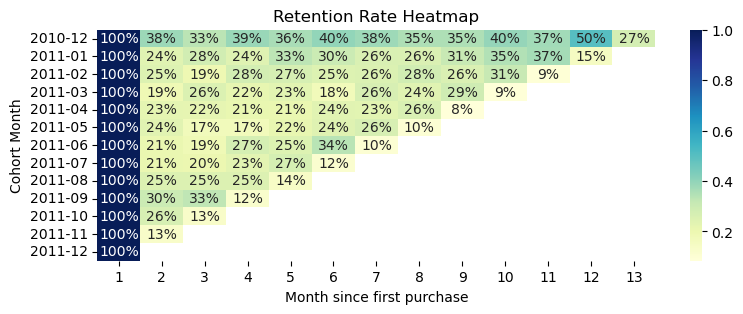

In [42]:
plt.figure(figsize = (9,3))
sns.heatmap(retention, annot = True, fmt ='.0%', cmap = 'YlGnBu')
plt.title('Retention Rate Heatmap')
plt.xlabel('Month since first purchase')
plt.ylabel('Cohort Month')
plt.show()
          

In [43]:
reference_date = df['InvoiceDate'].max() + pd.Timedelta(days=1)
reference_date

Timestamp('2011-12-10 12:50:00')

In [44]:
rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (reference_date - x.max()).days,
    'InvoiceNo': pd.Series.nunique,
    'Revenue': 'sum'
}).reset_index()
    

In [45]:
rfm.columns = ['CustomerID', 'recency_days', 'frequency', 'monetary']


In [46]:
rfm.head()

,CustomerID,recency_days,frequency,monetary
0,12346.0,326,2,5342.40
1,12347.0,2,7,431501.00
2,12348.0,75,4,82378.47
3,12349.0,19,1,176075.12
4,12350.0,310,1,48173.37


In [47]:
rfm.describe() #most customers are low frequency buyers

,CustomerID,recency_days,frequency,monetary
count,4372.000000,4372.000000,4372.000000,4.372000e+03
mean,15299.677722,92.047118,5.075480,2.372909e+05
std,1722.390705,100.765435,9.338754,5.944603e+05
min,12346.000000,1.000000,1.000000,1.736000e+01
25%,13812.750000,17.000000,1.000000,4.350893e+04
50%,15300.500000,50.000000,3.000000,1.066925e+05
75%,16778.250000,143.000000,5.000000,2.599154e+05
max,18287.000000,374.000000,248.000000,2.038383e+07


In [48]:
#Customer segmentation, normalise the features to get them to the same scale
rfm.columns

Index(['CustomerID', 'recency_days', 'frequency', 'monetary'], dtype='object')

In [49]:
X = rfm[['recency_days', 'frequency', 'monetary']].copy()

In [50]:
from sklearn.preprocessing  import StandardScaler

In [51]:
ss= StandardScaler()

In [52]:
X_scaled = ss.fit_transform(X)

In [53]:
X_scaled[:5]

array([[ 2.32202285, -0.32936215, -0.39022789],
       [-0.89373323,  0.20610242,  0.32673724],
       [-0.1691956 , -0.11517632, -0.26062315],
       [-0.72500529, -0.43645506, -0.1029888 ],
       [ 2.16322008, -0.43645506, -0.31816948]])

In [54]:
from sklearn.cluster import KMeans

In [55]:
from sklearn.metrics import silhouette_score

In [56]:
inertia = []
s_score =[]
k_range = range(2,11)

In [57]:
for k in k_range:
    km = KMeans(n_clusters = k, random_state=42, n_init=10)
    Labels = km.fit_predict(X_scaled)
    inertia.append(km.inertia_)
    s_score.append(silhouette_score(X_scaled, Labels))

Text(0, 0.5, 'Inertia')

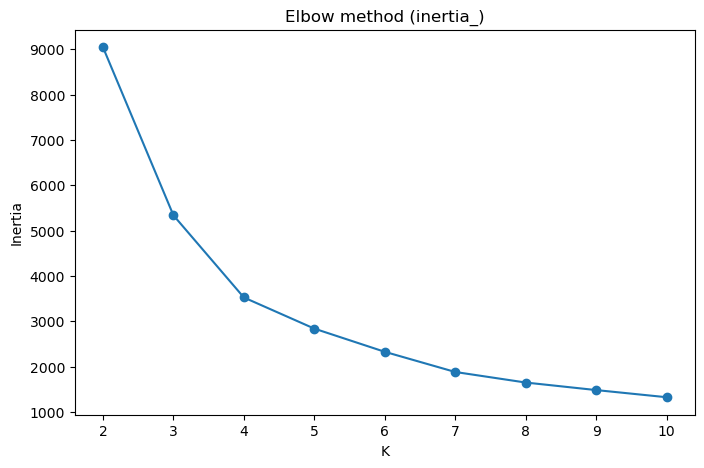

In [58]:
plt.figure(figsize=(8,5))
plt.plot(k_range, inertia, marker = "o")
plt.title("Elbow method (inertia_)")
plt.xlabel('K')
plt.ylabel('Inertia')

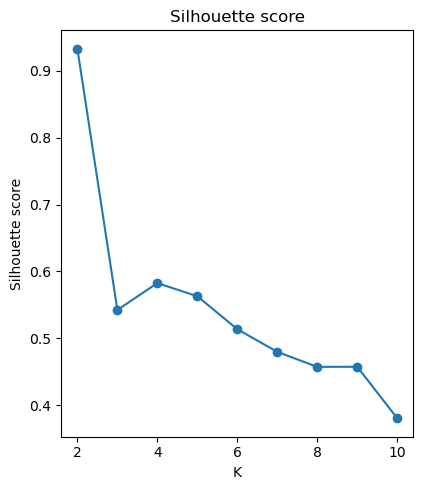

In [59]:
plt.figure(figsize=(8,5))
plt.subplot(1,2,2)
plt.plot(k_range, s_score, marker='o')
plt.title('Silhouette score')
plt.xlabel('K')
plt.ylabel('Silhouette score')
plt.tight_layout()
plt.show()

In [60]:
!pip install yellowbrick

In [61]:
from yellowbrick.cluster import KElbowVisualizer

In [62]:
model = KMeans(random_state=42)

/Applications/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Applications/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Applications/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Applications/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Applications/an

KElbowVisualizer(ax=<Axes: >, estimator=KMeans(n_clusters=9, random_state=42),
                 k=(2, 10))

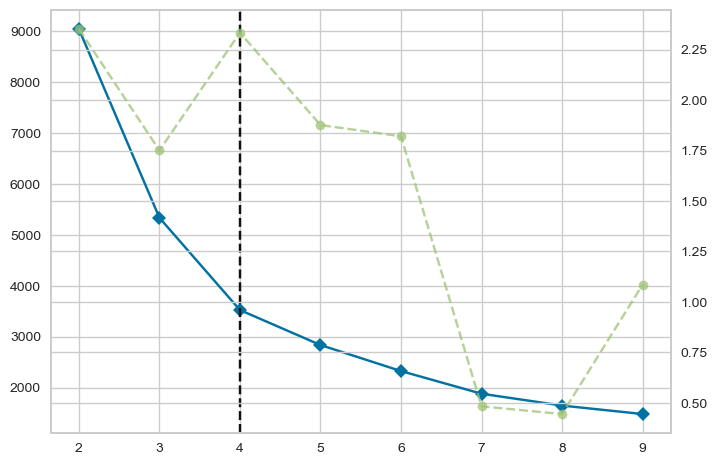

In [63]:
v = KElbowVisualizer(model, k=(2,10))
v.fit(X_scaled)

In [64]:
final_k=4
final_model =KMeans(n_clusters=final_k, random_state=42)

In [65]:
final_model.fit(X_scaled)

/Applications/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=42)

In [66]:
rfm.head()

,CustomerID,recency_days,frequency,monetary
0,12346.0,326,2,5342.40
1,12347.0,2,7,431501.00
2,12348.0,75,4,82378.47
3,12349.0,19,1,176075.12
4,12350.0,310,1,48173.37


In [67]:
rfm['Cluster'] = final_model.labels_

In [68]:
rfm.head()

,CustomerID,recency_days,frequency,monetary,Cluster
0,12346.0,326,2,5342.40,3
1,12347.0,2,7,431501.00,0
2,12348.0,75,4,82378.47,0
3,12349.0,19,1,176075.12,0
4,12350.0,310,1,48173.37,3


In [69]:
cluster_profile = rfm.groupby('Cluster').agg({
        'recency_days': 'mean', 
        'frequency': 'mean',
        'monetary': 'mean',
        'CustomerID': 'count'
}).rename(columns={'CustomerID': 'NumCustomers'}).round(1)

In [70]:
cluster_profile

,recency_days,frequency,monetary,NumCustomers
Cluster,,,,
0,43.6,4.2,194855.9,3025
1,11.9,25.2,1113680.2,269
2,1.7,153.5,12345024.6,6
3,249.4,1.8,69353.0,1072


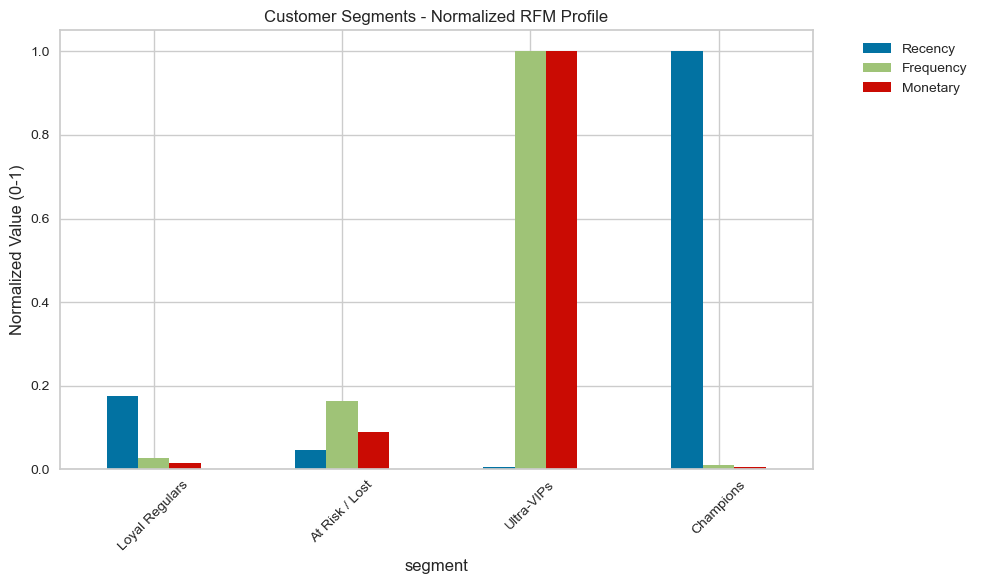

In [72]:
cluster_names = {
    0: "Loyal Regulars",
    1: "At Risk / Lost",
    2: "Ultra-VIPs",
    3: "Champions"
}

# Map cluster indices to names
cluster_profile['segment'] = cluster_profile.index.map(cluster_names)

# Normalize RFM values
df_plot = cluster_profile.copy()
df_plot[['recency_days', 'frequency', 'monetary']] = (
    df_plot[['recency_days', 'frequency', 'monetary']]
    .apply(lambda x: x / x.max())
)

# Plot normalized RFM profiles
df_plot.set_index('segment')[['recency_days', 'frequency', 'monetary']].plot(
    kind='bar', figsize=(10, 6)
)
plt.title('Customer Segments - Normalized RFM Profile')
plt.ylabel('Normalized Value (0-1)')
plt.xticks(rotation=45)
plt.legend(['Recency', 'Frequency', 'Monetary'], bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()